In [1]:
#!pip install -Uqq fastai
from fastcore.all import *
from fastdownload import download_url
from fastai.vision.utils import download_images, resize_images
from fastai.vision.all import *

In [2]:
!pip install -Uqq ddgs
from ddgs import DDGS

def search_images(keywords, max_images=200):
    return L(DDGS().images(keywords, max_results=max_images)).itemgot('image')

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 63.8 MB/s eta 0:00:00


In [3]:
from pathlib import Path
import time

categories = ['Arachnida', 'Crustacea', 'Insecta', 'Chilopoda', 'Diplopoda']

path = Path('Arthropods')

if not path.exists():
    path.mkdir()
    for cat in categories:
        dest = (path/cat)
        dest.mkdir(exist_ok=True)
        results = search_images(f"{cat}", max_images=200)
        download_images(dest, urls=results)
        time.sleep(10)

In [4]:
fns = get_image_files(path)
#fns
failed = verify_images(fns)
#failed
failed.map(Path.unlink)

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:3570: UserWarning: image file could not be identified because AVIF support not installed
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:3570: UserWarning: image file could not be identified because AVIF support not installed
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:3570: UserWarning: image file could not be identified because AVIF support not installed
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/PIL/TiffImagePlugin.py:950: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


(#15) [None,None,None,None,None,None,None,None,None,None,None,None,None,None,None]

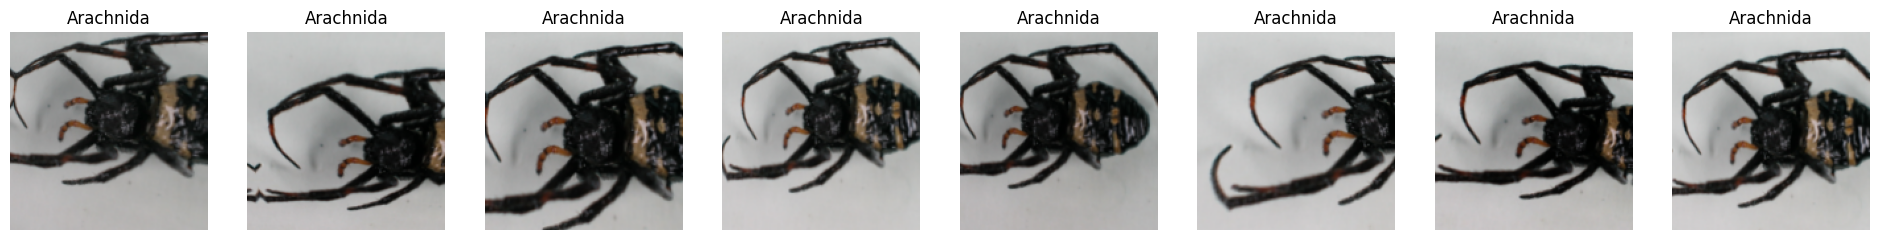

In [5]:
Artho = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label)

Artho = Artho.new(item_tfms=RandomResizedCrop(150, min_scale=0.5), batch_tfms=aug_transforms())
dls = Artho.dataloaders(path)
dls.train.show_batch(max_n=8, nrows=1, unique=True)

In [6]:
learn = vision_learner(dls, resnet50, metrics=error_rate)
learn.fine_tune(6)

Downloading: "https://download.pytorch.org/models/resnet50-11ad3fa6.pth" to /root/.cache/torch/hub/checkpoints/resnet50-11ad3fa6.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 174MB/s]


epoch,train_loss,valid_loss,error_rate,time
0,2.458523,0.963029,0.313253,00:52


/usr/local/lib/python3.11/dist-packages/PIL/TiffImagePlugin.py:950: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


epoch,train_loss,valid_loss,error_rate,time
0,1.028705,0.831464,0.313253,01:05
1,0.873275,0.721832,0.253012,01:06
2,0.731136,0.772939,0.277108,01:04
3,0.588786,0.788215,0.240964,01:06
4,0.503047,0.755962,0.265060,01:07
5,0.429154,0.754779,0.265060,01:05


/usr/local/lib/python3.11/dist-packages/PIL/TiffImagePlugin.py:950: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/TiffImagePlugin.py:950: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
/usr/local/lib/python3.11/dist-packages/PIL/TiffImagePlugin.py:950: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be conv

In [7]:
learn.export('model_artho.pkl')